## **Import the neccessary libraries**

In [ ]:
!pip install python-crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:00


In [ ]:
import nltk
import time
from nltk.probability import LidstoneProbDist
import matplotlib.pyplot as plt

nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

## **Creating a function that measures the execution time of a given function**

In [ ]:
def measure_time(func, *args, **kwargs):
    # Record the starting time before function execution
    start_time = time.perf_counter()
    # Call the function with the provided arguments and store the result
    result = func(*args, **kwargs)
    # Record the ending time after the function execution
    end_time = time.perf_counter()
    # Calculate the total elapsed time
    elapsed_time = end_time - start_time

    return result, elapsed_time

## **Creating a general function for spliting the corpus into test and train datasets**

In [ ]:
def train_test_data(train , test=3000):
    # Get tagged sentences from the Treebank corpus
    tagged_sentences = nltk.corpus.treebank.tagged_sents()
    # Split the data into training set based on the 'train' parameter
    train_data = tagged_sentences[:train]
    # Split the data into test set starting from the 'test' parameter
    test_data = tagged_sentences[test:]

    return train_data , test_data

## **Implement Hidden Markov Model**

In [ ]:
def hidden_markov_model(train, test):
    # Initialize a Hidden Markov Model trainer
    trainer = nltk.tag.HiddenMarkovModelTrainer()
    # Measure the time taken to train the HMM using supervised training on the train data
    HMM, training_time = measure_time(trainer.train_supervised, train)
    # Measure the time taken to compute the accuracy of the trained HMM on the test data
    accuracy, inference_time = measure_time(HMM.accuracy, test)

    return [training_time, inference_time, accuracy]

## **Implement Hidden Markov Model using LID Smoothing**

In [ ]:
def LID(fd, bins):
  return LidstoneProbDist(fd, 0.1, bins)

def hidden_markov_model_LID(train, test):
    # Initialize the HMM trainer
    trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
    # Train the HMM using the supervised training with the custom estimator (Lidstone distribution)
    HMM, training_time = measure_time(trainer.train_supervised, train, estimator=LID)
    # Measure the time taken to compute the accuracy on the test data
    accuracy, inference_time = measure_time(HMM.accuracy, test)

    return [training_time, inference_time, accuracy]

## **Implement TnT**

In [ ]:
def TnT(train, test):
    # Initialize the TnT tagger
    TnT_tagger = nltk.tag.TnT()
    # Train the TnT tagger on the train data, measuring the time taken
    _, training_time = measure_time(TnT_tagger.train, train)
    # Measure the time taken to compute the accuracy on the test data
    accuracy, inference_time = measure_time(TnT_tagger.accuracy, test)

    return [training_time, inference_time, accuracy]

## **Implement Perceptron**

In [ ]:
def perceptron(train, test):
    # Initialize the Perceptron tagger and specifying not to load a pre-trained model
    perceptron = nltk.tag.perceptron.PerceptronTagger(load=False)
    # Train the Perceptron tagger on the train data, measuring the time taken
    _, training_time = measure_time(perceptron.train, train)
    # Measure the time taken to compute the accuracy on the test data
    accuracy, inference_time = measure_time(perceptron.accuracy, test)

    return [training_time, inference_time, accuracy]

## **Implement CRF**

In [ ]:
def CRF(train, test):
    # Initialize the CRF tagger
    crf = nltk.tag.CRFTagger()
    # Train the CRF tagger on the train data saving the model as 'crf_tagger_model' and measure the time taken for training
    _, training_time = measure_time(crf.train, train, 'crf_tagger_model')
    # Measure the time taken to compute the accuracy on the test data
    accuracy, inference_time = measure_time(crf.accuracy, test)

    return [training_time, inference_time, accuracy]

## **Creating a general function for plotting the results**

In [ ]:
def plot_results(accuracies, train_time, test_time,train_sizes):
    # Create two subplots side-by-side in a figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot accuracy vs train sizes on the first subplot
    ax1.plot(train_sizes, accuracies, marker='o', linestyle='-', color='g')
    ax1.set_title('Train size vs Accuracy')
    ax1.set_xlabel('Train size')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(train_sizes)  # Set the ticks on the x-axis to match the train sizes

    # Plot training time and testing time vs train sizes on the second subplot
    ax2.plot(train_sizes, train_time, marker='x', linestyle='--', color='r', label='Training Time')
    ax2.plot(train_sizes, test_time, marker='s', linestyle=':', color='g', label='Inference Time')
    ax2.set_title('Train size vs Execution time')
    ax2.set_xlabel('Train size')
    ax2.set_ylabel('Execution time')
    ax2.set_xticks(train_sizes)  # Set the ticks on the x-axis to match the train sizes
    ax2.legend()  # Add a legend

    # Display the plots
    plt.show()

## **Train HMM model with different train sizes**

In [ ]:
train_sizes = [500, 1000, 1500, 2000, 2500,3000]

In [ ]:
hmm_accuracies = []
hmm_train_time = []
hmm_test_time = []
for train_size in train_sizes:
  train_data, test_data = train_test_data(train=train_size, test=3000)
  hmm_results = hidden_markov_model(train_data, test_data)
  print(f"HMM with train size {train_size}")
  print(f"Training Time: {hmm_results[0]:.4f} seconds")
  print(f"Inference Time: {hmm_results[1]:.4f} seconds")
  print(f"Accuracy of HMM: {hmm_results[2]:.4f}")
  print("________________________________________")
  hmm_train_time.append(hmm_results[0])
  hmm_test_time.append(hmm_results[1])
  hmm_accuracies.append(hmm_results[2])

/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


HMM with train size 500
Training Time: 0.0969 seconds
Inference Time: 4.1650 seconds
Accuracy of HMM: 0.1729
________________________________________
HMM with train size 1000
Training Time: 0.3864 seconds
Inference Time: 4.2823 seconds
Accuracy of HMM: 0.2207
________________________________________
HMM with train size 1500
Training Time: 0.2949 seconds
Inference Time: 4.5149 seconds
Accuracy of HMM: 0.2616
________________________________________
HMM with train size 2000
Training Time: 0.6903 seconds
Inference Time: 5.4939 seconds
Accuracy of HMM: 0.3043
________________________________________
HMM with train size 2500
Training Time: 0.4999 seconds
Inference Time: 5.9144 seconds
Accuracy of HMM: 0.3351
________________________________________
HMM with train size 3000
Training Time: 0.6028 seconds
Inference Time: 5.1336 seconds
Accuracy of HMM: 0.3684
________________________________________


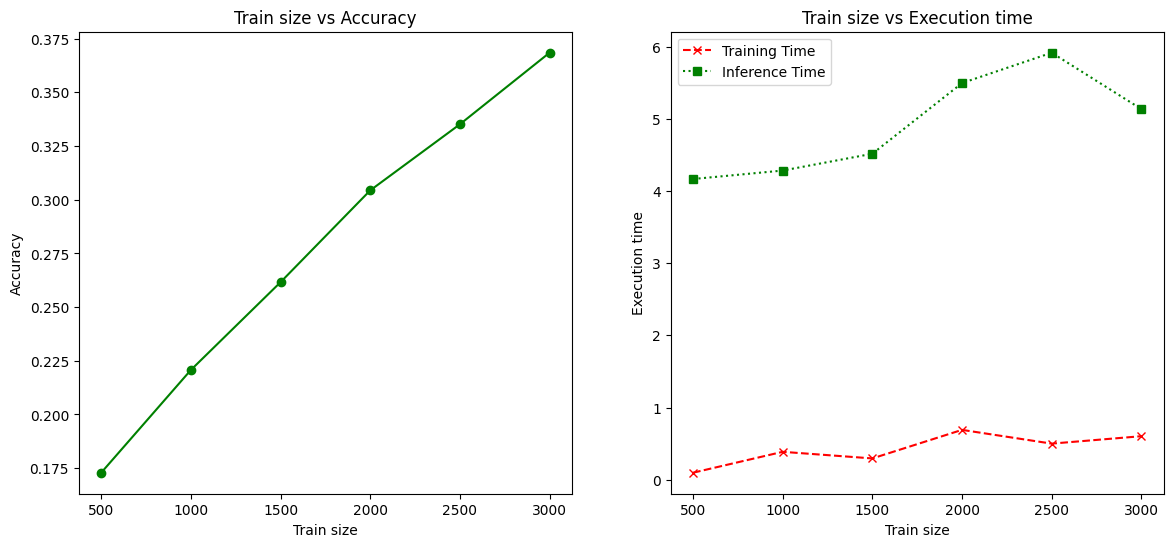

In [ ]:
plot_results(hmm_accuracies, hmm_train_time, hmm_test_time,train_sizes)

## **Training HMM using LID with different train sizes**

In [ ]:
hmm_lid_accuracies = []
hmm_lid_train_time = []
hmm_lid_test_time = []
for train_size in train_sizes:
  train_data, test_data = train_test_data(train=train_size, test=3000)
  hmm_lid_results = hidden_markov_model_LID(train_data, test_data)
  print(f"HMM with LID with train size {train_size}")
  print(f"Training Time: {hmm_lid_results[0]:.4f}")
  print(f"Inference Time: {hmm_lid_results[1]:.4f}")
  print(f"Accuracy of HMM using LID: {hmm_lid_results[2]:.4f}")
  print("________________________________________")
  hmm_lid_train_time.append(hmm_lid_results[0])
  hmm_lid_test_time.append(hmm_lid_results[1])
  hmm_lid_accuracies.append(hmm_lid_results[2])


HMM with LID with train size 500
Training Time: 0.1027
Inference Time: 5.3264
Accuracy of HMM using LID: 0.7937
________________________________________
HMM with LID with train size 1000
Training Time: 0.1928
Inference Time: 4.2296
Accuracy of HMM using LID: 0.8348
________________________________________
HMM with LID with train size 1500
Training Time: 0.2994
Inference Time: 5.3218
Accuracy of HMM using LID: 0.8594
________________________________________
HMM with LID with train size 2000
Training Time: 0.4167
Inference Time: 4.6280
Accuracy of HMM using LID: 0.8762
________________________________________
HMM with LID with train size 2500
Training Time: 0.5124
Inference Time: 5.5588
Accuracy of HMM using LID: 0.8865
________________________________________
HMM with LID with train size 3000
Training Time: 0.6113
Inference Time: 4.7097
Accuracy of HMM using LID: 0.8984
________________________________________


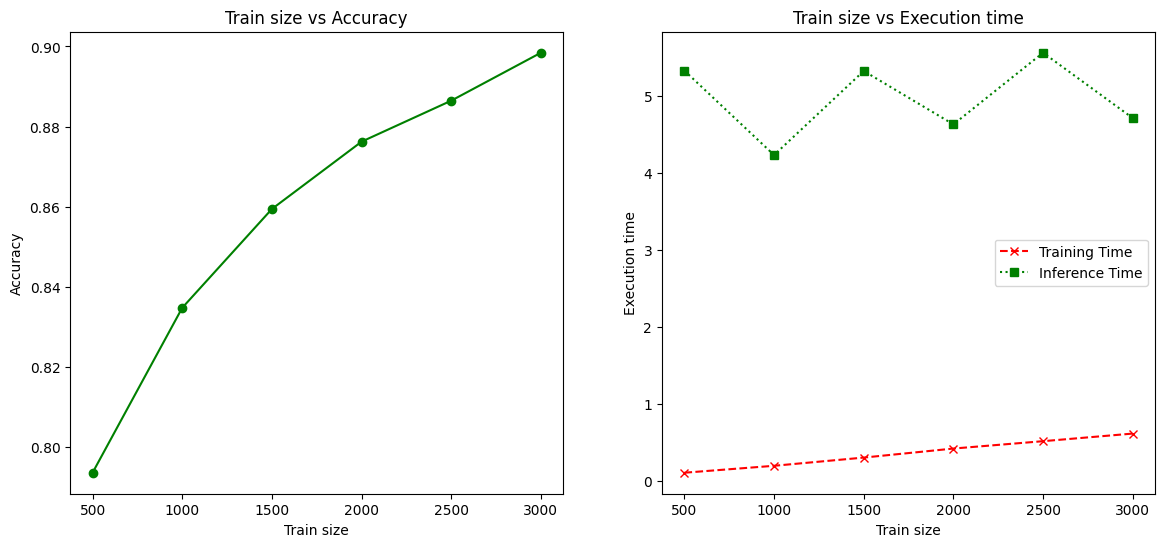

In [ ]:
plot_results(hmm_lid_accuracies, hmm_lid_train_time, hmm_lid_test_time,train_sizes)

## **Training TNT with different train sizes**

In [ ]:
TnT_accuracies = []
TnT_train_time = []
TnT_test_time = []
for train_size in train_sizes:
  train_data, test_data = train_test_data(train=train_size, test=3000)
  TnT_results = TnT(train_data, test_data)
  print(f"TNT with train size {train_size}")
  print(f"Training Time: {TnT_results[0]:.4f}")
  print(f"Inference Time: {TnT_results[1]:.4f}")
  print(f"Accuracy of TnT: {TnT_results[2]:.4f}")
  print("________________________________________")
  TnT_train_time.append(TnT_results[0])
  TnT_test_time.append(TnT_results[1])
  TnT_accuracies.append(TnT_results[2])


TNT with train size 500
Training Time: 0.1416
Inference Time: 14.2812
Accuracy of TnT: 0.7473
________________________________________
TNT with train size 1000
Training Time: 0.3585
Inference Time: 30.7468
Accuracy of TnT: 0.7963
________________________________________
TNT with train size 1500
Training Time: 0.7994
Inference Time: 51.1413
Accuracy of TnT: 0.8275
________________________________________
TNT with train size 2000
Training Time: 0.9405
Inference Time: 65.3761
Accuracy of TnT: 0.8485
________________________________________
TNT with train size 2500
Training Time: 0.7266
Inference Time: 69.1895
Accuracy of TnT: 0.8623
________________________________________
TNT with train size 3000
Training Time: 0.9066
Inference Time: 73.3078
Accuracy of TnT: 0.8755
________________________________________


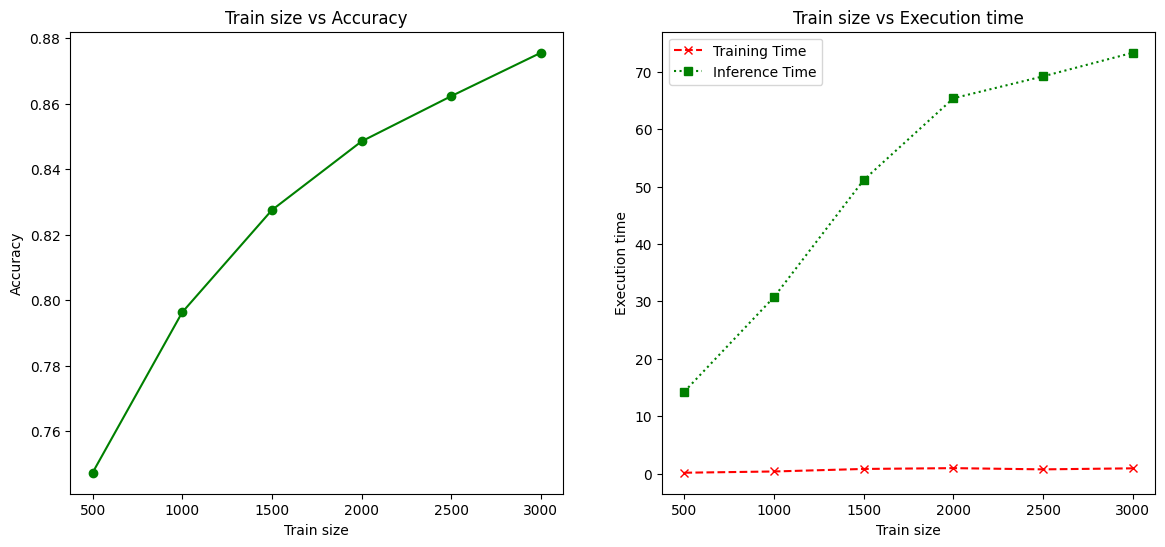

In [ ]:
plot_results(TnT_accuracies, TnT_train_time, TnT_test_time,train_sizes)

## **Training Perceptron with different train sizes**

In [ ]:
perceptron_accuracies = []
perceptron_train_time = []
perceptron_test_time = []
for train_size in train_sizes:
  train_data, test_data = train_test_data(train=train_size, test=3000)
  perceptron_results = perceptron(train_data, test_data)
  print(f"Perceptron with train size {train_size}")
  print(f"Training Time: {perceptron_results[0]:.4f}")
  print(f"Inference Time: {perceptron_results[1]:.4f}")
  print(f"Accuracy of Perceptron: {perceptron_results[2]:.4f}")
  print("________________________________________")
  perceptron_train_time.append(perceptron_results[0])
  perceptron_test_time.append(perceptron_results[1])
  perceptron_accuracies.append(perceptron_results[2])

Perceptron with train size 500
Training Time: 2.5656
Inference Time: 1.1204
Accuracy of Perceptron: 0.9126
________________________________________
Perceptron with train size 1000
Training Time: 5.0668
Inference Time: 1.2126
Accuracy of Perceptron: 0.9337
________________________________________
Perceptron with train size 1500
Training Time: 7.4895
Inference Time: 1.1687
Accuracy of Perceptron: 0.9409
________________________________________
Perceptron with train size 2000
Training Time: 11.1884
Inference Time: 1.1484
Accuracy of Perceptron: 0.9484
________________________________________
Perceptron with train size 2500
Training Time: 13.3161
Inference Time: 1.4962
Accuracy of Perceptron: 0.9518
________________________________________
Perceptron with train size 3000
Training Time: 15.5410
Inference Time: 1.1830
Accuracy of Perceptron: 0.9594
________________________________________


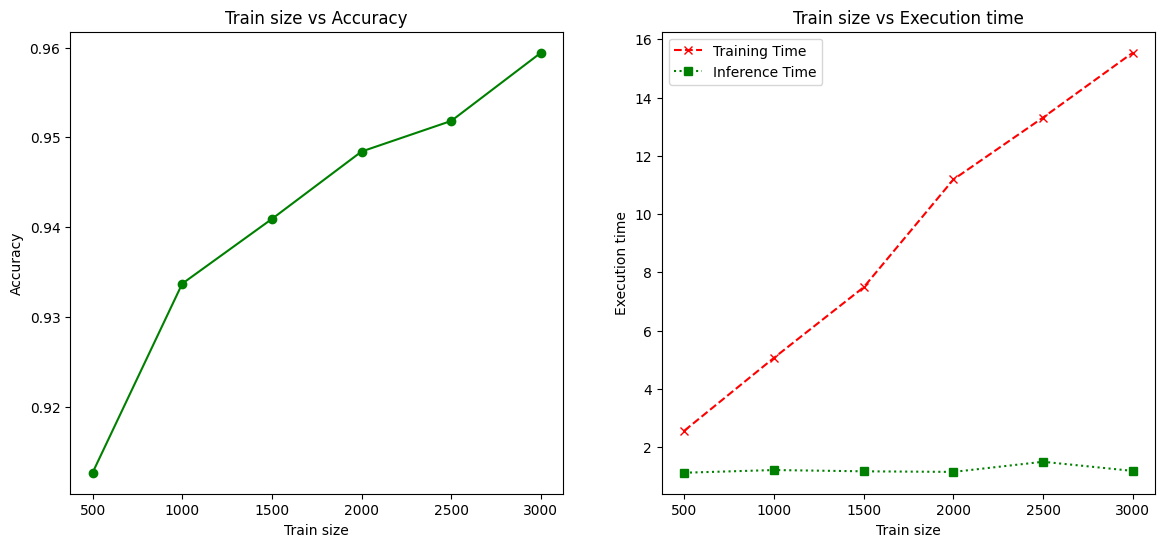

In [ ]:
plot_results(perceptron_accuracies, perceptron_train_time, perceptron_test_time,train_sizes)

## **Training CRF with different train sizes**

In [ ]:
crf_accuracies = []
crf_train_time = []
crf_test_time = []
for train_size in train_sizes:
  train_data, test_data = train_test_data(train=train_size, test=3000)
  CRF_results = CRF(train_data, test_data)
  print(f"CRF with train size {train_size}")
  print(f"Training Time: {CRF_results[0]:.4f}")
  print(f"Inference Time: {CRF_results[1]:.4f}")
  print(f"Accuracy of CRF: {CRF_results[2]:.4f}")
  print("________________________________________")
  crf_train_time.append(CRF_results[0])
  crf_test_time.append(CRF_results[1])
  crf_accuracies.append(CRF_results[2])


CRF with train size 500
Training Time: 2.1661
Inference Time: 0.5041
Accuracy of CRF: 0.9096
________________________________________
CRF with train size 1000
Training Time: 6.2836
Inference Time: 0.4822
Accuracy of CRF: 0.9249
________________________________________
CRF with train size 1500
Training Time: 10.8285
Inference Time: 0.4829
Accuracy of CRF: 0.9330
________________________________________
CRF with train size 2000
Training Time: 19.6281
Inference Time: 0.6172
Accuracy of CRF: 0.9392
________________________________________
CRF with train size 2500
Training Time: 28.6894
Inference Time: 0.5868
Accuracy of CRF: 0.9430
________________________________________
CRF with train size 3000
Training Time: 35.6302
Inference Time: 0.5983
Accuracy of CRF: 0.9475
________________________________________


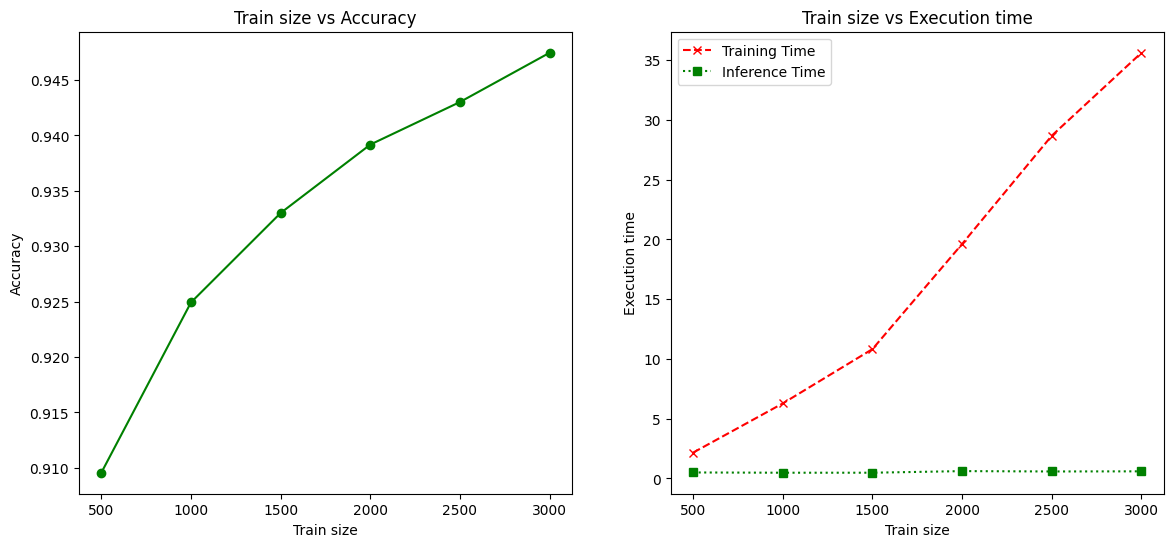

In [ ]:
plot_results(crf_accuracies, crf_train_time, crf_test_time,train_sizes)

## **Plotting all the results together for comparison**

In [ ]:
import matplotlib.pyplot as plt


def plot_learning_curves(train_sizes, data,title,ylabel):
    plt.figure(figsize=(10, 6))

    # Define a color and marker for each model for better visualization
    model_styles = {
        'HMM': {'color': 'blue', 'marker': 'o'},
        'HMM_LID': {'color': 'green', 'marker': 's'},
        'TnT': {'color': 'red', 'marker': '^'},
        'Perceptron': {'color': 'purple', 'marker': 'D'},
        'CRF': {'color': 'orange', 'marker': 'v'}
    }

    for model, style in model_styles.items():
        plt.plot(
            train_sizes,
            data[model],
            label=model,
            color=style['color'],
            marker=style['marker'],
            linestyle='-'
        )

    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
# Dictionary to store all the updated "_dict" data
accuracies = {
    "HMM": hmm_accuracies,
    "HMM_LID": hmm_lid_accuracies,
    "TnT": TnT_accuracies,
    "Perceptron": perceptron_accuracies,
    "CRF": crf_accuracies
}

train_times = {
    "HMM": hmm_train_time,
    "HMM_LID": hmm_lid_train_time,
    "TnT": TnT_train_time,
    "Perceptron": perceptron_train_time,
    "CRF": crf_train_time
}
test_times = {
    "HMM": hmm_test_time,
    "HMM_LID": hmm_lid_test_time,
    "TnT": TnT_test_time,
    "Perceptron": perceptron_test_time,
    "CRF": crf_test_time
}



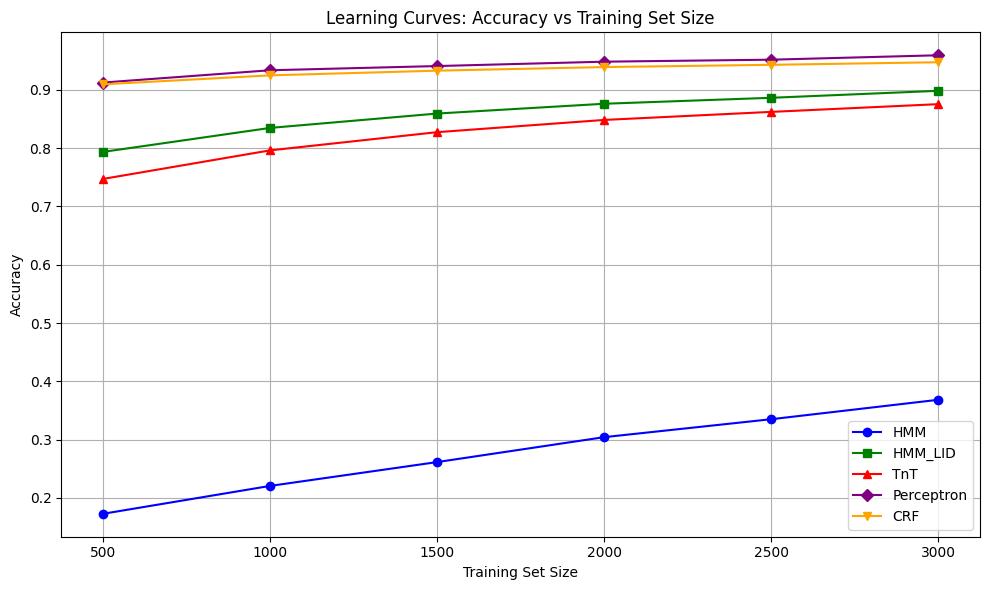

In [ ]:
# Plot the learning curves
plot_learning_curves(train_sizes, accuracies,'Learning Curves: Accuracy vs Training Set Size','Accuracy')

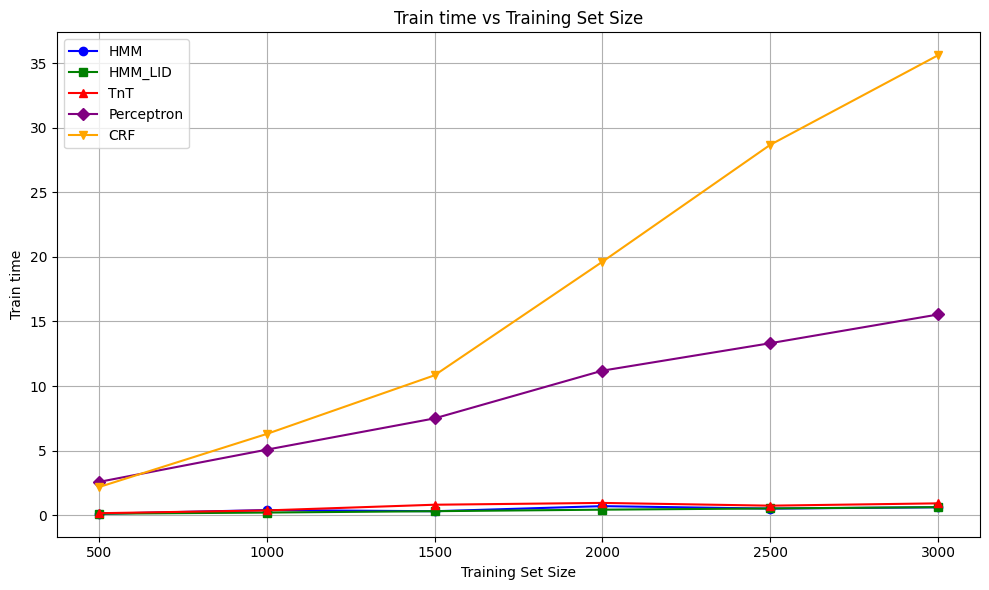

In [ ]:
# Plot the train time vs train size
plot_learning_curves(train_sizes, train_times,'Train time vs Training Set Size','Train time')

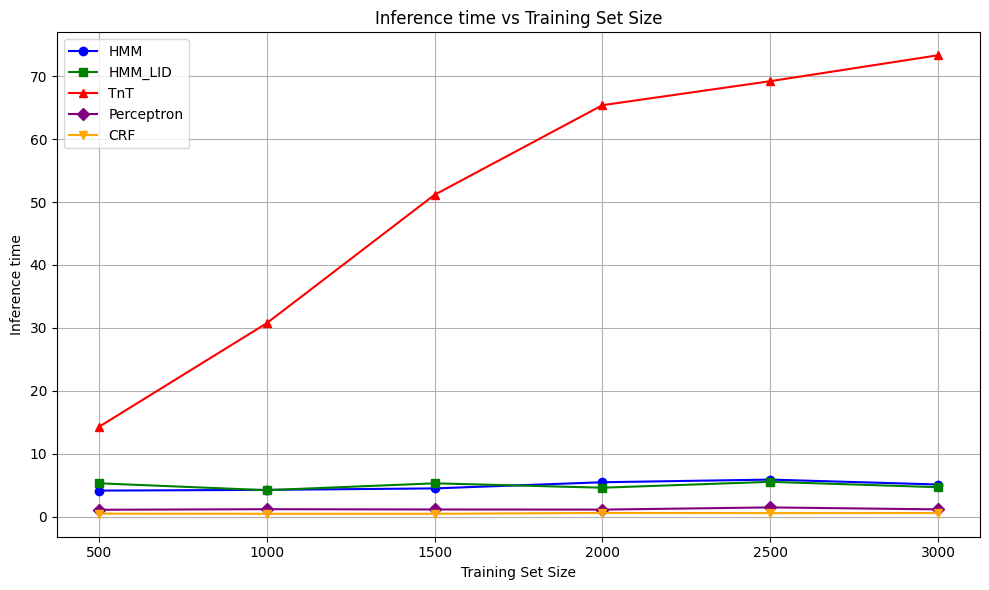

In [ ]:
# Plot the inference time vs train size
plot_learning_curves(train_sizes, test_times,'Inference time vs Training Set Size','Inference time')

## **Analyzings and conclusions**

Let's have a brief anylize for each of them:

### ***Hidden Markov Model & LID Smoothing***

**Training Time**: Since the training in this model involves transition and emission probabilities based on the observed data , the calculations are straightforward, involving mostly frequency counts. This leads to a shorter train time.

**Inference Time**: The inference time here measures the process of decoding the most probable sequence of states given observations that invloves dynamic programming , so as the complexity increases we get a higher value.

**Accurancy**: As we can observe from the plot, the accurancy is quite low. This happens because HMM doesn’t effectively handle ambiguous or overlapping features in the data. To help prevent issues of data sparsity and improve the estimation of transition and emission probabilities and make the model more robust, we used LID Smoothing and accurancy changes to a higher value, which make it comparable with the other models.

### ***TnT Model***

**Training Time**: Since it is designed to be an efficient tagger based on trigrams, and it learns from the co-occurrences of tags and words, its training time is moderate as it needs to estimate trigram frequencies and probabilities.

**Inference Time**: As we can observe, TnT has the largest inference time and the larger the training size , the larger it will become. This is because the trigram context involves searching for possible tag sequences, which becomes computationally expensive. The state space explodes, leading to slower performance.

**Accuracy**: Low values here may come from its reliance on local trigram contexts and its limited ability to handle rare or unseen patterns.

### ***Perceptron Model***
**Training Time**: It has a higher training time compared to the others as it performs multiple passes over the training data, adjusting weights iteratively based on classification errors. As the training data grows, the number of iterations also grows, resulting in an increase in training time.

**Inference Time**: The inference time is very low compared to other models discused so far. During this step, it only calculates a dot product between the learned weights and the feature vector, which is computationally efficient and very fast.

**Accuracy**: As we can see, the accuracy is consistently high, without being affected from training size because it can learn more complex relationships between input features and output tags. However, we think that it requires a large amount of training data and iterations to fine tune its parameters.

###***CRF Model***
**Training Time**: CRF is a model that can learn complex relationships between input and output sequences by maximizing the conditional likelihood of the labels. The largest training time correspond to the fact that they need to compute normalization factors across all possible label sequences, which involves a considerable computational cost, especially when dataset size is larger.

**Inference Time**: It has the lowest inference time since it use efficient dynamic programming techniques for prediction. Unlike TnT, CRFs can model complex features without relying on high-order n-grams, leading to shorter inference times.

**Accuracy**: As previously mentioned, the reason for its high accuracy is that instead of handling each position separately, they are trained to maximise the likelihood of the complete label sequence given the observation sequence. They are therefore very good at capturing dependencies between labels, which makes them a great choice for tasks involving sequence prediction.

*Which model would you select?*

We would select the **Perceptron** model as the best choice based on:

*   It has consistently achieved very high accuracy. It has the best one in all the different training set sizes compared to other models.
*   The inference time for the Perceptron even though it's not the best,it is very low. This makes it suitable for real-time applications, balancing both high accuracy and efficient prediction time.
*   While its training time is high, it is still lower compared to CRF. Given that training can often be a one-time cost, a higher training time we think is acceptable if it leads to high accuracy and fast inference.

CRF is also a strong model, with high accuracy and low inference time. However, its training time is much longer compared to the Perceptron.
Choosing it over Perceptron makes sense if inference speed is critical and a slight reduction in accuracy is acceptable. Its ability to model complex dependencies is also a plus in certain types of prediction tasks, especially in NLP.


